# Neural Network Benchmarks

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = "1"
import pycuda.autoinit
import tensorflow as tf

In [2]:
from Modules.Neural_Network import *

In [3]:
df_features = get_pickle_data(columns_to_drop=['dryFile','peelFile','m_dThickness','traindevtest'])

In [4]:
df_features

,m_uWidth,m_uLength,B1MoistureAvg,B1TemperatureAvg,B1DensityAvg,B1KnotWidthSum,B1KnotCount,B1DecayWidthSum,B1DecayCount,B1AllOtherDefectWidthSum,...,B9DensityAvg,B9KnotWidthSum,B9KnotCount,B9DecayWidthSum,B9DecayCount,B9AllOtherDefectWidthSum,B9AllOtherDefectCount,dryMoisturePercentage,dryWidth,dryShrinkage
0,1752.857999,1601.361282,92.845796,35.887911,822.237016,121.999478,11.0165,0.000000,0.000,0.000000,...,798.575665,12.878009,3.9980,0.000000,0.000,0.000000,0.000,1.725665,1627.857301,0.929616
1,1749.357534,1604.490731,100.541401,34.852659,914.008944,120.826406,10.0150,0.000000,0.000,0.000000,...,884.168198,93.305799,7.0070,0.000000,0.000,0.000000,0.000,2.717948,1635.039146,0.934184
2,1752.857999,1599.323635,98.544407,36.270205,948.524069,221.378355,12.9935,0.000000,0.000,0.000000,...,952.523696,150.739739,13.0195,0.000000,0.000,215.521785,1.998,0.595620,1408.515390,0.803151
3,1751.982883,1597.799181,90.844779,27.964081,934.734964,25.170654,2.9985,0.000000,0.000,0.000000,...,919.429445,11.144183,0.9990,0.000000,0.000,0.000000,0.000,0.483188,1630.202664,0.932818
4,1748.482417,1597.580820,94.841824,35.824946,882.312661,26.980654,3.9960,0.000000,0.000,0.000000,...,828.915909,4.685256,0.9995,0.000000,0.000,0.000000,0.000,1.441128,1621.842809,0.928498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
548406,1751.982883,1603.689688,105.644787,36.024270,960.001503,193.653545,13.9930,40.410335,1.998,143.186258,...,964.135822,3.513942,1.0010,49.293630,5.005,0.000000,0.000,5.502986,1630.268703,0.931924
548407,1749.357534,1603.107586,100.764526,35.657713,905.383275,41.560848,3.0045,31.609659,2.003,6.455118,...,920.576322,104.246950,7.9920,0.000000,0.000,4.097548,2.997,1.069432,1573.988850,0.901102
548408,1749.357534,1606.600195,88.244604,30.422695,847.366044,11.121917,1.9980,0.000000,0.000,0.000000,...,828.453970,40.491196,3.0045,0.000000,0.000,73.170506,2.003,2.806563,1607.928125,0.918694
548409,1751.982883,1600.413985,102.542927,34.661381,914.946383,53.374771,7.0070,0.000000,0.000,0.000000,...,907.124825,34.622907,6.0090,0.000000,0.000,0.000000,0.000,5.743990,1641.571606,0.940263


## Parameters
### Testing different optimizers

In [5]:
#Split an Scale parameters
df_target='dryShrinkage'
test_size=0.2
norm='standard' # 'minmax'

# Model creation parameters
inputs = 84 # df.shape[1]
# hidden_sizes = [64,32,16]   #Original
hidden_sizes = [256,128,64,32,16]
outputs = 1
activ = 'relu'

# Model fit parameters
EPOCHS = 5
loss = 'mse'
# optimizer = tf.keras.optimizers.RMSprop   #Original
optimizer = tf.keras.optimizers.Adam
# optimizer = tf.keras.optimizers.SGD
# optimizer = tf.keras.optimizers.Adadelta
# optimizer = tf.keras.optimizers.Adagrad
lr = 0.001
metrics = ['mae', 'mse', distance_from_true, 'mape', precentage_from_true]
with_predictions = False

# Model Saving parameters
save_model = True
# Saved model format
# path='./models/SavedModel'
path='./HDF5Models/Adam4_model.h5'


# Model stats saving parameters
csv_path='./logs/'
save_to_csv=True

parameters=(df_features, df_target, test_size, norm, inputs, hidden_sizes, outputs, activ, EPOCHS, loss, optimizer, lr, metrics, with_predictions, save_model, path)

## Starting the neural network

In [6]:
%%time
model, history, train, test, model_name = create_compile_and_fit(*parameters)

Train set size: (438728, 84) / Train sets target size: (438728,)
Test set size: (109683, 84) / Test sets target size: (109683,) 

Scaling done. Next is model creation

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               21760     
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)     

## Saving the model and creating model_stats csv

In [7]:
df = model_stat(model, history, df_features, df_target, test_size, norm, inputs, hidden_sizes, outputs ,activ, EPOCHS, loss, optimizer, lr, metrics, train, test, csv_path, save_to_csv, model_name)

In [8]:
df

,0
Model structure,<keras.engine.sequential.Sequential object at ...
Inputs,84
Hidden layers,"[256, 128, 64, 32, 16]"
Output,1
Activation,relu
Optimizer,<class 'keras.optimizer_v2.adam.Adam'>
Learning rate,0.001
Normalization,standard
Loss fuction,mse
Epochs,5


In [11]:
# pip install tabulate
print(df.to_markdown())

|                 | 0                                                             |
|:----------------|:--------------------------------------------------------------|
| Model structure | <keras.engine.sequential.Sequential object at 0x7f50013a6850> |
| Inputs          | 84                                                            |
| Hidden layers   | [64, 32, 16]                                                  |
| Output          | 1                                                             |
| Activation      | relu                                                          |
| Optimizer       | <class 'keras.optimizer_v2.gradient_descent.SGD'>             |
| Learning rate   | 0.001                                                         |
| Normalization   | standard                                                      |
| Loss fuction    | mse                                                           |
| Epochs          | 5                                                       

In [18]:
history.history

{'loss': [0.0013132741441950202,
  1.6343525203410536e-05,
  4.9446634875494055e-06,
  3.1787769785296405e-06,
  2.729902689679875e-06],
 'mae': [0.013199614360928535,
  0.002840221393853426,
  0.0016233002534136176,
  0.0013353890972211957,
  0.0012611576821655035],
 'mse': [0.0013132741441950202,
  1.6343525203410536e-05,
  4.9446634875494055e-06,
  3.1787769785296405e-06,
  2.729902689679875e-06],
 'distance_from_true': [-0.0009577093296684325,
  -1.8882810763898306e-05,
  -2.5697834189486457e-06,
  -1.12491431991657e-06,
  -8.786122407400399e-07],
 'mape': [1.4316589832305908,
  0.30825528502464294,
  0.17667461931705475,
  0.1449780911207199,
  0.13677671551704407],
 'precentage_from_true': [0.9989691376686096,
  0.9999841451644897,
  1.0000004768371582,
  0.9999995827674866,
  1.0000016689300537],
 'val_loss': [4.8802965466165915e-05,
  3.7149236504774308e-06,
  4.934924618282821e-06,
  1.5951999330354738e-06,
  1.5274529232556233e-06],
 'val_mae': [0.005561783444136381,
  0.0015

In [9]:
model_stats

{'Model structure': '<keras.engine.sequential.Sequential object at 0x7f87ebd63f10>',
 'Epochs': 2,
 'Train-set size': 0.8,
 'Test-set size': 0.2,
 'Normalization': 'standard',
 'Activation': 'relu',
 'Optimizer': 'rmsprop',
 'Train Loss': [0.0015263119712471962, 2.2931088096811436e-05],
 'Validation Loss': [2.487129131623078e-05, 7.86396412877366e-06]}

In [9]:
history.history

{'loss': [0.0005418657092377543,
  5.940294158790493e-06,
  2.8602773909369716e-06,
  2.250743818876799e-06,
  1.8899954739026725e-06],
 'mae': [0.009040821343660355,
  0.001714266138151288,
  0.0012584258802235126,
  0.0011644369224086404,
  0.0011050959583371878],
 'mse': [0.0005418657092377543,
  5.940294158790493e-06,
  2.8602773909369716e-06,
  2.250743818876799e-06,
  1.8899954739026725e-06],
 'distance_from_true': [-0.00042115896940231323,
  -4.811799954040907e-06,
  -7.304308837774443e-07,
  -8.506576136824151e-07,
  -5.20687535754405e-07],
 'mape': [0.9805039763450623,
  0.1861361861228943,
  0.13658876717090607,
  0.1263395994901657,
  0.11986450850963593],
 'precentage_from_true': [0.9995498061180115,
  1.0000022649765015,
  0.9999994039535522,
  1.0000007152557373,
  1.0000020265579224],
 'val_loss': [1.101946963899536e-05,
  2.3593931928189704e-06,
  3.1578135804011254e-06,
  1.2370310287224129e-06,
  7.30533338355599e-06],
 'val_mae': [0.0027050734497606754,
  0.001218005

## Visualize model's results

In [10]:
from Modules.model_accuracy import *
from Modules.dataloader import dataLoader

In [11]:
help(modelAccuracy)

Help on function modelAccuracy in module Modules.model_accuracy:

modelAccuracy(model, data, visualize=True)
    ----------------------------------------------------
    VERSION : 31/11/2021
    
    LAST UPDATE : 
        - Fixed the example for how to use this function
        - Fixed percentage plotting 
    -----------------------------------------------------
    
    
    Function for visualizing model's predictions and errors.
    
    ARGS : 
        - model: Pretrained neural network model
        - data: Data for prediction e.q. test_data
        - visualize: Plotting
        
    EXAMPLE : 
        - If the model is defined before:
            modelAccuracy(model, data=(transformed_test_data,test_targets), visualize=True)
        
    RETURNS :
    
        Nothing



In [12]:
help(dataLoader)

Help on function dataLoader in module Modules.dataloader:

dataLoader(data_path='/home/jovyan/work/augmented-data/augmentedNew.pkl', test_size=0.3, random_state=None)
    ------------------
    VERSION 30/11/2021
    ------------------
    
    DESCRIPTION : 
        Creates standardized data and splits it to train- and test sets.
    
    EXAMPLE : 
        - transformed_train_data, transformed_test_data, train_targets, test_targets = dataLoader('/home/jovyan/work/augmented-data/augmentedNew.pkl')
        
    ARGS : 
        - data_path : Path to pickled data.
        - test_size : Float. Train/test split ratio.
        - random_state : Int or None. Controls the shuffling applied to the data before applying the split. 
        
    RETURNS : 
        transformed_train_data, transformed_test_data, train_targets, test_targets



### Defining data

In [13]:
transformed_train_data, transformed_test_data, train_targets, test_targets = dataLoader('/home/jovyan/work/augmented-data/augmented4.pkl')

70.0% train
30.0% test
random_state = None

Train data: (383983, 84)
Test data: (164565, 84)

Done in 3.18s.


### Call accuracy function for visualization


		Predicitons and targets
--------------------------------------------------------
 Average difference:	0.002490125852454376
 Max difference:	0.005872709100208873
 Min difference:	-0.0011965225352909004
--------------------------------------------------------


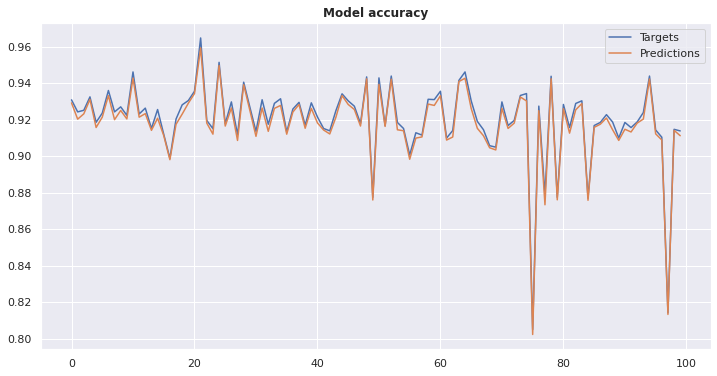

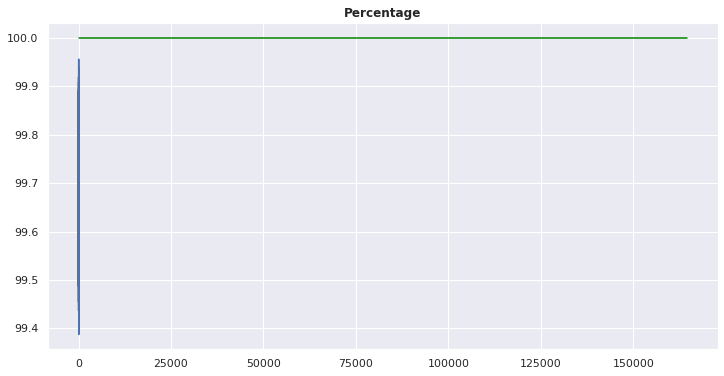

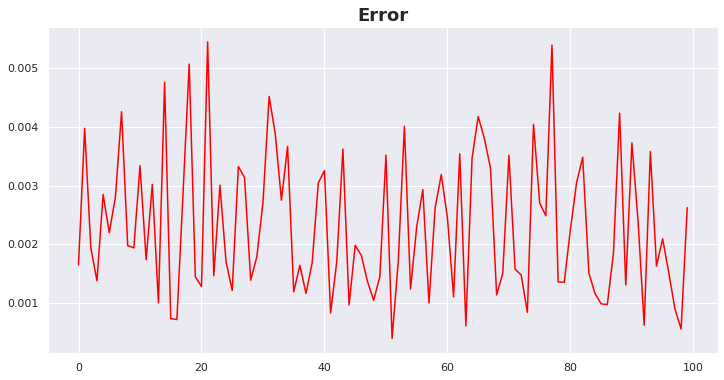

In [14]:
modelAccuracy(model, data=(transformed_test_data,test_targets), visualize=True)

## ADAM

In [25]:
df_stats = pd.read_csv('./logs/2021-12-02 09:16:44.022368-log.csv')

In [26]:
df_stats

,epoch,distance_from_true,loss,mae,mape,mse,precentage_from_true,val_distance_from_true,val_loss,val_mae,val_mape,val_mse,val_precentage_from_true
0,0,-9.577093e-04,0.001313,0.013200,1.431659,0.001313,0.998969,0.003483,0.000049,0.005562,0.604055,0.000049,1.003779
1,1,-1.888281e-05,0.000016,0.002840,0.308255,0.000016,0.999984,-0.000677,0.000004,0.001516,0.164518,0.000004,0.999274
2,2,-2.569783e-06,0.000005,0.001623,0.176675,0.000005,1.000000,0.000729,0.000005,0.001722,0.187582,0.000005,1.000803
3,3,-1.124914e-06,0.000003,0.001335,0.144978,0.000003,1.000000,-0.000263,0.000002,0.001045,0.113537,0.000002,0.999723
4,4,-8.786122e-07,0.000003,0.001261,0.136777,0.000003,1.000002,0.000390,0.000002,0.001033,0.112150,0.000002,1.000426


## SGD

In [18]:
df_stats = pd.read_csv('./logs/2021-12-02 11:40:25.202923-log.csv')

In [19]:
df_stats

,epoch,distance_from_true,loss,mae,mape,mse,precentage_from_true,val_distance_from_true,val_loss,val_mae,val_mape,val_mse,val_precentage_from_true
0,0,-0.016148,0.021443,0.099433,10.787689,0.021443,0.982905,-0.003898,0.005281,0.056772,6.158052,0.005281,0.995920
1,1,-0.002535,0.003581,0.046451,5.037933,0.003581,0.997358,-0.002683,0.002549,0.039281,4.259379,0.002549,0.997170
2,2,-0.001378,0.002038,0.034969,3.791549,0.002038,0.998571,-0.001117,0.001671,0.031650,3.431334,0.001671,0.998848
3,3,-0.000929,0.001435,0.029281,3.174201,0.001435,0.999048,-0.000463,0.001254,0.027365,2.966194,0.001254,0.999549
4,4,-0.000705,0.001115,0.025795,2.795786,0.001115,0.999283,-0.000926,0.001004,0.024483,2.653333,0.001004,0.999039


In [21]:
SGD_model = pd.read_csv('./logs/2021-12-02 11:40:25.202923-model_stats.csv')
SGD_model

,Unnamed: 0,0
0,Model structure,<keras.engine.sequential.Sequential object at ...
1,Inputs,84
2,Hidden layers,"[64, 32, 16]"
3,Output,1
4,Activation,relu
5,Optimizer,<class 'keras.optimizer_v2.gradient_descent.SGD'>
6,Learning rate,0.001
7,Normalization,standard
8,Loss fuction,mse
9,Epochs,5


## AdaDelta

In [15]:
df_stats = pd.read_csv('./logs/AdaDelta-log.csv')
df_stats

,epoch,distance_from_true,loss,mae,mape,mse,precentage_from_true,val_distance_from_true,val_loss,val_mae,val_mape,val_mse,val_precentage_from_true
0,0,-0.358361,0.368019,0.483815,52.389713,0.368019,0.612044,-0.057578,0.093113,0.243066,26.328949,0.093113,0.938189
1,1,-0.036837,0.060228,0.190346,20.637894,0.060228,0.960580,-0.025369,0.039835,0.154619,16.778122,0.039835,0.972982
2,2,-0.018883,0.029837,0.132557,14.387180,0.029837,0.979951,-0.014551,0.022234,0.114828,12.463874,0.022234,0.984609
3,3,-0.011733,0.017557,0.102240,11.096364,0.017557,0.987611,-0.010513,0.013830,0.091424,9.920383,0.013830,0.988893
4,4,-0.008067,0.011378,0.082986,9.004072,0.011378,0.991500,-0.007125,0.009347,0.075339,8.173112,0.009347,0.992482


In [17]:
adaDelta = pd.read_csv('./logs/AdaDelta-model_stats.csv')
adaDelta

,Unnamed: 0,0
0,Model structure,<keras.engine.sequential.Sequential object at ...
1,Inputs,84
2,Hidden layers,"[64, 32, 16]"
3,Output,1
4,Activation,relu
5,Optimizer,<class 'keras.optimizer_v2.adadelta.Adadelta'>
6,Learning rate,0.001
7,Normalization,standard
8,Loss fuction,mse
9,Epochs,5


## AdaGrad

In [15]:
df_stats = pd.read_csv('./logs/AdaGrad-log.csv')
df_stats

,epoch,distance_from_true,loss,mae,mape,mse,precentage_from_true,val_distance_from_true,val_loss,val_mae,val_mape,val_mse,val_precentage_from_true
0,0,-0.020430,0.019781,0.094251,10.238256,0.019781,0.978131,-0.003125,0.005304,0.055352,6.009901,0.005304,0.996699
1,1,-0.003745,0.003675,0.045758,4.966637,0.003675,0.996006,-0.002876,0.002663,0.039074,4.238626,0.002663,0.996931
2,2,-0.002236,0.002123,0.034739,3.767750,0.002123,0.997621,-0.001895,0.001725,0.031370,3.400918,0.001725,0.997979
3,3,-0.001549,0.001463,0.028733,3.114880,0.001463,0.998352,-0.000402,0.001258,0.026662,2.889763,0.001258,0.999594
4,4,-0.001127,0.001109,0.024948,2.703922,0.001109,0.998805,-0.000878,0.000987,0.023572,2.554444,0.000987,0.999071


In [16]:
adaGrad = pd.read_csv('./logs/AdaGrad-model_stats.csv')
adaGrad

,Unnamed: 0,0
0,Model structure,<keras.engine.sequential.Sequential object at ...
1,Inputs,84
2,Hidden layers,"[64, 32, 16]"
3,Output,1
4,Activation,relu
5,Optimizer,<class 'keras.optimizer_v2.adagrad.Adagrad'>
6,Learning rate,0.001
7,Normalization,standard
8,Loss fuction,mse
9,Epochs,5


## Adam + `[256,128,64,32,16]`

In [15]:
adam2 = pd.read_csv('./logs/adam+4layers-log.csv')
adam2

,epoch,distance_from_true,loss,mae,mape,mse,precentage_from_true,val_distance_from_true,val_loss,val_mae,val_mape,val_mse,val_precentage_from_true
0,0,-5.266121e-04,0.000578,0.009342,1.013319,0.000578,0.999433,-0.000278,0.000009,0.002144,0.232557,0.000009,0.999697
1,1,-5.300206e-06,0.000006,0.001717,0.186301,0.000006,0.999999,-0.000752,0.000004,0.001486,0.162593,0.000004,0.999204
2,2,-1.233341e-06,0.000002,0.001221,0.132394,0.000002,1.000003,0.000020,0.000001,0.000975,0.105700,0.000001,1.000025
3,3,-6.035775e-07,0.000002,0.001095,0.118717,0.000002,1.000003,0.001035,0.000004,0.001515,0.165412,0.000004,1.001122
4,4,-4.884080e-07,0.000002,0.001078,0.116861,0.000002,0.999999,0.000239,0.000001,0.000945,0.102499,0.000001,1.000264


In [16]:
adam2_model = pd.read_csv('./logs/adam+4layers-model_stats.csv')
adam2_model

,Unnamed: 0,0
0,Model structure,<keras.engine.sequential.Sequential object at ...
1,Inputs,84
2,Hidden layers,"[256, 128, 64, 32, 16]"
3,Output,1
4,Activation,relu
5,Optimizer,<class 'keras.optimizer_v2.adam.Adam'>
6,Learning rate,0.001
7,Normalization,standard
8,Loss fuction,mse
9,Epochs,5


## Adam + `[256,128,64,32,16]` + lr=0.0017

In [15]:
adam3 = pd.read_csv('./logs/adam3-log.csv')
adam3

,epoch,distance_from_true,loss,mae,mape,mse,precentage_from_true,val_distance_from_true,val_loss,val_mae,val_mape,val_mse,val_precentage_from_true
0,0,-5.572194e-04,0.000616,0.007733,0.838799,0.000616,0.999401,-0.001408,0.000004,0.001678,0.181927,0.000004,0.998476
1,1,-5.190920e-06,0.000009,0.001763,0.191529,0.000009,0.999999,0.000739,0.000003,0.001282,0.139192,0.000003,1.000802
2,2,-4.879338e-07,0.000004,0.001380,0.149740,0.000004,1.000002,-0.001270,0.000003,0.001495,0.162049,0.000003,0.998630
3,3,-4.229814e-07,0.000002,0.001196,0.129757,0.000002,1.000003,-0.000819,0.000002,0.001075,0.116460,0.000002,0.999114
4,4,-2.734479e-07,0.000002,0.001146,0.124367,0.000002,1.000001,-0.000223,0.000001,0.000976,0.105860,0.000001,0.999763


In [16]:
adam3_model = pd.read_csv('./logs/adam3-model_stats.csv')
adam3_model

,Unnamed: 0,0
0,Model structure,<keras.engine.sequential.Sequential object at ...
1,Inputs,84
2,Hidden layers,"[256, 128, 64, 32, 16]"
3,Output,1
4,Activation,relu
5,Optimizer,<class 'keras.optimizer_v2.adam.Adam'>
6,Learning rate,0.0017
7,Normalization,standard
8,Loss fuction,mse
9,Epochs,5


In [15]:
adam3 = pd.read_csv('./logs/2021-12-02 13:30:50.794328-log.csv')
adam3

,epoch,distance_from_true,loss,mae,mape,mse,precentage_from_true,val_distance_from_true,val_loss,val_mae,val_mape,val_mse,val_precentage_from_true
0,0,-6.517190e-04,0.000657,0.009349,1.014220,0.000657,0.999300,-0.000348,0.000009,0.002210,0.240200,0.000009,0.999629
1,1,-6.926979e-06,0.000007,0.001828,0.198282,0.000007,0.999994,0.000098,0.000002,0.001085,0.118017,0.000002,1.000107
2,2,-1.453744e-06,0.000003,0.001295,0.140554,0.000003,1.000001,0.000145,0.000001,0.000989,0.107392,0.000001,1.000160
3,3,-6.986591e-07,0.000002,0.001132,0.122814,0.000002,1.000000,-0.000516,0.000002,0.001022,0.110691,0.000002,0.999447
4,4,-7.739748e-07,0.000002,0.001132,0.122842,0.000002,1.000000,-0.000715,0.000002,0.001072,0.116400,0.000002,0.999225
